**PNEUMONIA DETECTION**

**importing library**

In [ ]:
import tensorflow as tf
import os
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.metrics import Precision, Recall, AUC

**Dataset prepocessing**

In [4]:
train_path="//kaggle/input/chest-xray-pneumonia/chest_xray/train/"
val_path="//kaggle/input/chest-xray-pneumonia/chest_xray/val/"
test_path="//kaggle/input/chest-xray-pneumonia/chest_xray/test/"

train_gen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
val_gen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
test_gen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

train_ds=train_gen.flow_from_directory(
    train_path,
    target_size=(120, 120),
    batch_size=8,
    class_mode="binary"
)
val_ds=val_gen.flow_from_directory(
    val_path,
    target_size=(120, 120),
    batch_size=8,
    class_mode="binary"
)
test_ds=test_gen.flow_from_directory(
    test_path,
    target_size=(120, 120),
    batch_size=8,
    class_mode="binary"
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


**Creating Model**

In [5]:

model=tf.keras.Sequential([
    Conv2D(32,(3,3),input_shape=(120,120,3),activation="relu"),
    BatchNormalization(),
    MaxPooling2D(),
    Dense(64,activation="relu",kernel_regularizer=l2(0.01)),
    
    Conv2D(64,(3,3),activation="relu"),
    BatchNormalization(),
    MaxPooling2D(),
    Dense(64,activation="relu",kernel_regularizer=l2(0.01)),
    
    Conv2D(128,(3,3),activation="relu"),
    BatchNormalization(),
    MaxPooling2D(),
    Dense(64,activation="relu",kernel_regularizer=l2(0.01)),
    
    Conv2D(256,(3,3),activation="relu"),
    BatchNormalization(),
    MaxPooling2D(),
    Dense(64,activation="relu",kernel_regularizer=l2(0.01)),
    
    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid") 
    
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 118, 118, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 118, 118, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 59, 59, 32)        0         
 D)                                                              
                                                                 
 dense (Dense)               (None, 59, 59, 64)        2112      
                                                                 
 conv2d_1 (Conv2D)           (None, 57, 57, 64)        36928     
                                                                 
 batch_normalization_1 (Bat  (None, 57, 57, 64)        2

**learing rate and optimization**

In [7]:
lr=0.00001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    lr, decay_steps=10000, decay_rate=0.9, staircase=True
)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
    loss="binary_crossentropy",
    metrics=["accuracy", Precision(), Recall(), AUC()]
)


**model fitting**

In [8]:
data=model.fit(train_ds, epochs=20, validation_data=val_ds)

Epoch 1/20
652/652 [==============================] - 81s 105ms/step - loss: 3.3440 - accuracy: 0.8259 - precision: 0.8774 - recall: 0.8901 - auc: 0.8619 - val_loss: 4.5290 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000 - val_auc: 0.7812
Epoch 2/20
652/652 [==============================] - 46s 70ms/step - loss: 3.1339 - accuracy: 0.9070 - precision: 0.9328 - recall: 0.9427 - auc: 0.9547 - val_loss: 4.0581 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000 - val_auc: 0.9297
Epoch 3/20
652/652 [==============================] - 46s 71ms/step - loss: 3.0454 - accuracy: 0.9298 - precision: 0.9486 - recall: 0.9574 - auc: 0.9749 - val_loss: 3.8332 - val_accuracy: 0.6250 - val_precision: 0.5714 - val_recall: 1.0000 - val_auc: 0.9844
Epoch 4/20
652/652 [==============================] - 47s 72ms/step - loss: 2.9881 - accuracy: 0.9450 - precision: 0.9600 - recall: 0.9662 - auc: 0.9829 - val_loss: 3.6956 - val_accuracy: 0.6250 - val_precision: 0.5714 - val_

**testing**

In [11]:
test_loss, test_acc, test_pre, test_recall, test_auc = model.evaluate(test_ds)
print(f"Loss: {test_loss}")
print(f"Accuracy: {test_acc}")
print(f"Precision: {test_pre}")
print(f"Test Recall: {test_recall}")
print(f"AUC: {test_auc}")

78/78 [==============================] - 5s 64ms/step - loss: 2.9673 - accuracy: 0.7917 - precision: 0.7539 - recall: 0.9897 - auc: 0.8900
Loss: 2.967294216156006
Accuracy: 0.7916666865348816
Precision: 0.75390625
Test Recall: 0.9897435903549194
AUC: 0.8899846076965332


**testing some images**

1/1 [==============================] - 0s 26ms/step


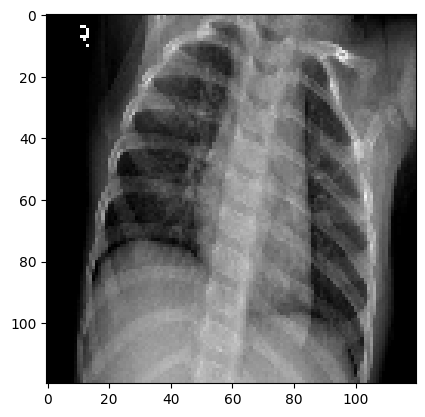

sad to hear!! you have pneumonia :  [98.417076]


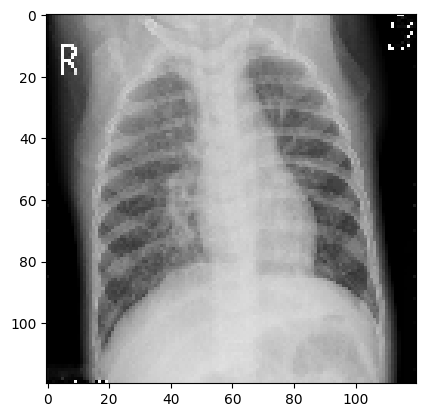

sad to hear!! you have pneumonia :  [99.98521]


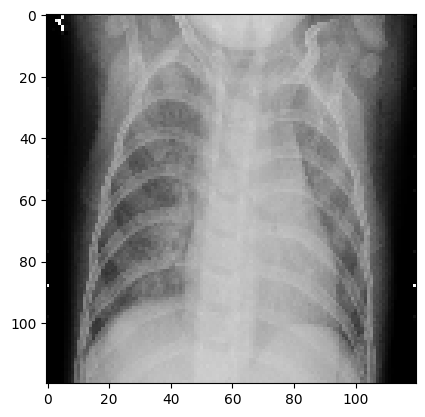

sad to hear!! you have pneumonia :  [99.99947]


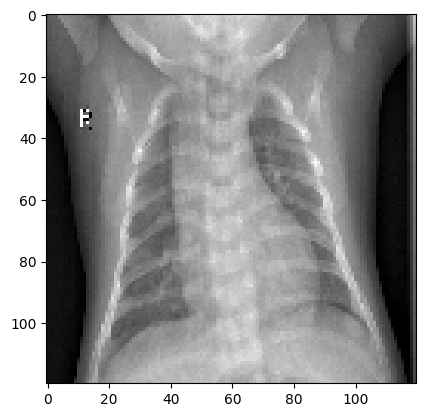

sad to hear!! you have pneumonia :  [70.914795]


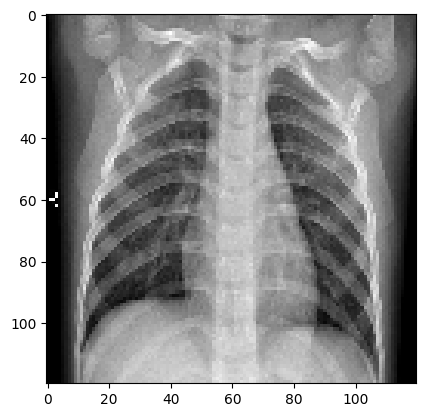

awesome you don't have pneumonia :  [2.4693947]


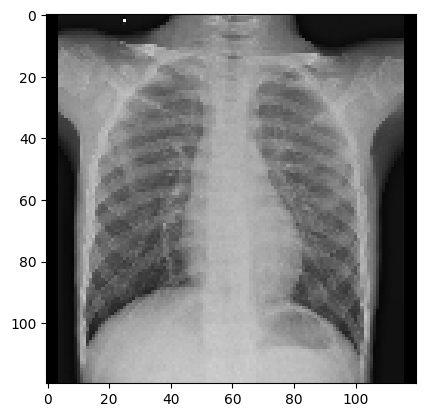

awesome you don't have pneumonia :  [39.509254]


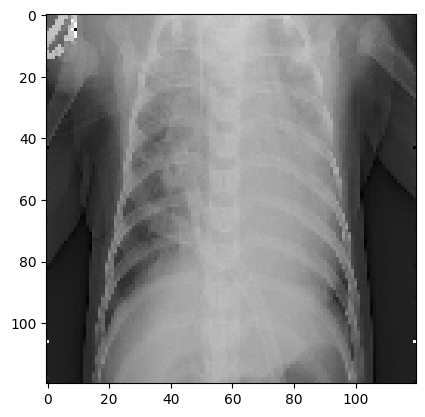

sad to hear!! you have pneumonia :  [99.99964]


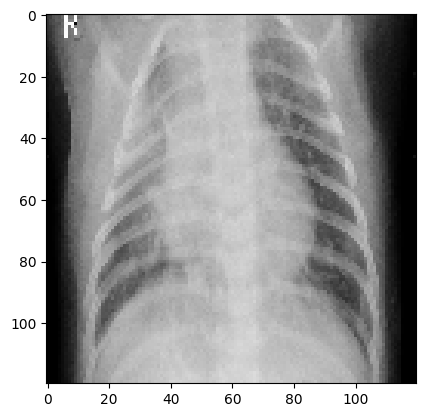

sad to hear!! you have pneumonia :  [99.9607]


In [14]:
x, y = test_ds.next()
predictions = model.predict(x)

import matplotlib.pyplot as plt
for i in range(8):
    plt.imshow(x[i])
    plt.show()
    if predictions[i]>0.5:
        print("sad to hear!! you have pneumonia : ", predictions[i]*100)
    else:
        print("awesome you don't have pneumonia : ", predictions[i]*100)